<a href="https://colab.research.google.com/github/nikakoga/Bioinformatic/blob/main/training_PCSS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

all_data = pd.read_csv("/content/drive/MyDrive/IBD/PCSS.zip (Unzipped Files)/genes_response_dataset.csv")
all_data = all_data.replace('N', np.NaN)

datasets = [
    "GSE206285",
    "GSE207022",
    "GSE112366",
]
ustekinumab = all_data[all_data["dataset"].isin(datasets)]
ustekinumab = ustekinumab[ustekinumab['response']!="CO"]
ustekinumab = ustekinumab.dropna(axis=1, how='all')

<ipython-input-2-48e04890d6d6>:4: DtypeWarning: Columns (5,12,13,17,20,21,22,24,32,48,60,80,82,83,86,87,88,89,90,91,102,111,112,113,117,131,139,140,142,147,151,152,153,154,159,160,164,176,177,180,189,193,194,196,198,205,207,209,216,231,233,240,243,245,248,262,283,286,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,362,363,367,372,378,379,391,392,393,400,405,406,407,417,418,419,420,421,424,433,434,435,436,437,469,482,484,488,490,492,493,494,501,510,518,520,527,561,562,563,567,575,593,605,606,612,615,616,617,619,621,623,636,637,638,641,645,661,664,665,671,672,678,695,698,706,707,709,711,714,715,716,720,721,732,733,734,735,736,744,757,760,763,766,772,778,781,784,805,806,811,812,813,814,816,822,829,835,836,841,849,855,857,859,861,862,886,892,899,901,904,905,916,922,927,929,933,948,952,954,955,958,963,974,975,976,978,979,982,984,985,993,994,1001,1002,1006,1009,1011,1012,1013,1017,1020,1022,1033,1046,1047,1048,1049,1050,1051

In [16]:
len(ustekinumab)

1037

In [4]:
# Grupowanie danych po 'dataset' i liczenie wartości 'response'
response_counts = ustekinumab.groupby('dataset')['response'].value_counts().unstack(fill_value=0)

# Wyświetlenie wyników
print(response_counts)


response    No  Yes
dataset            
GSE112366  179  183
GSE206285  455   95
GSE207022  113   12


In [5]:
# # Wybierz tylko kolumny numeryczne
# numerical_data = ustekinumab.select_dtypes(include=[np.number]).dropna(axis=0, how='any')

# # Dopasowanie etykiet do zredukowanego zbioru danych
# ustekinumab = ustekinumab.loc[numerical_data.index]
# dataset_labels = ustekinumab['dataset']

# # Standaryzacja danych
# scaler = StandardScaler()
# numerical_data_scaled = scaler.fit_transform(numerical_data)

# # Redukcja wymiarowości za pomocą UMAP
# reducer = umap.UMAP(random_state=42)
# embedding = reducer.fit_transform(numerical_data_scaled)

# # Kolory dla poszczególnych datasetów
# dataset_colors = {
#     "GSE206285": 'tab:blue',
#     "GSE207022": 'tab:orange',
#     "GSE112366": 'tab:green'
# }

# # Wizualizacja UMAP
# plt.figure(figsize=(12, 8))
# for dataset, color in dataset_colors.items():
#     subset = dataset_labels == dataset
#     plt.scatter(
#         embedding[subset, 0],
#         embedding[subset, 1],
#         label=dataset,
#         color=color,
#         s=30,
#         alpha=0.7,
#         edgecolor='k'
#     )

# plt.title('UMAP Projection of Ustekinumab Datasets')
# plt.xlabel('UMAP Dimension 1')
# plt.ylabel('UMAP Dimension 2')
# plt.legend(title='Dataset', loc='upper right')
# plt.show()


In [6]:
# # # Przygotowanie metadanych
# # batch_labels = ustekinumab['dataset']

# # # Standaryzacja danych
# # scaler = StandardScaler()
# # numerical_data_scaled = scaler.fit_transform(numerical_data)

# # # Konwersja do AnnData (struktura danych używana w scanpy)
# # adata = sc.AnnData(numerical_data_scaled)
# # adata.obs['batch'] = batch_labels.values

# # # Usunięcie efektu partii za pomocą Combat
# # sc.pp.combat(adata, key='batch')

# # # Redukcja wymiarowości za pomocą UMAP
# # reducer = umap.UMAP(random_state=42)
# # embedding = reducer.fit_transform(adata.X)

# # # Kolory dla poszczególnych datasetów
# # dataset_colors = {
# #     "GSE206285": 'tab:blue',
# #     "GSE207022": 'tab:orange',
# #     "GSE112366": 'tab:green'
# # }

# # # Wizualizacja UMAP
# # plt.figure(figsize=(12, 8))
# # for dataset, color in dataset_colors.items():
# #     subset = batch_labels == dataset
# #     plt.scatter(
# #         embedding[subset, 0],
# #         embedding[subset, 1],
# #         label=dataset,
# #         color=color,
# #         s=30,
# #         alpha=0.7,
# #         edgecolor='k'
# #     )

# # plt.title('UMAP Projection After Combat Batch Effect Removal')
# # plt.xlabel('UMAP Dimension 1')
# # plt.ylabel('UMAP Dimension 2')
# # plt.legend(title='Dataset', loc='upper right')
# # plt.show()

In [3]:
pip install scanpy

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 5.4 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=2c7254b1ca2c88a4fa704a893a35e58a6c117516ac83d57a2dc743382132d654
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info


In [4]:
import warnings

# Wyłącz wszystkie warningi
warnings.filterwarnings('ignore')

🔄 Verifying data consistency...
✅ Number of samples: 1037
✅ Unique batch labels: ['GSE206285' 'GSE207022' 'GSE112366']


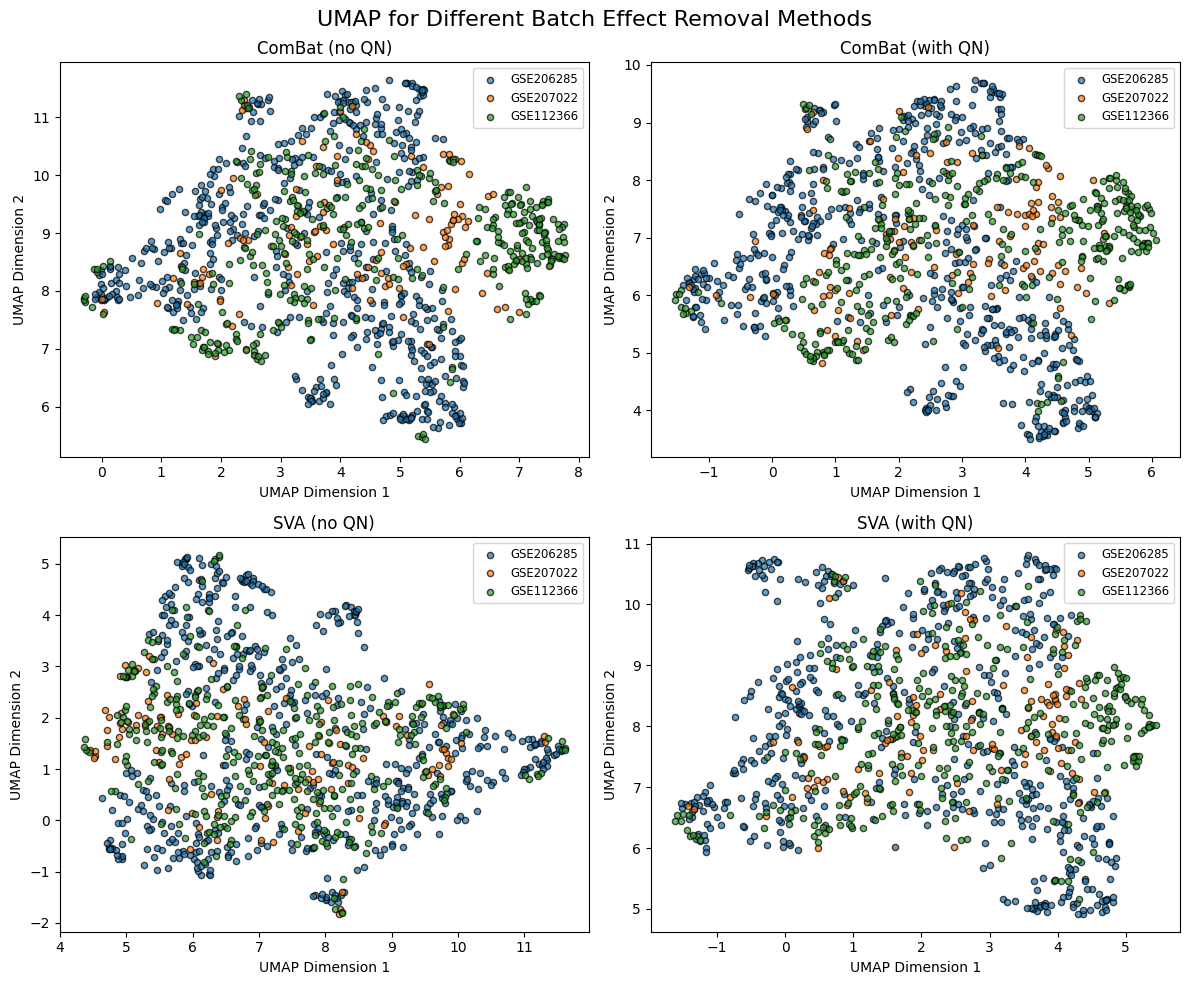

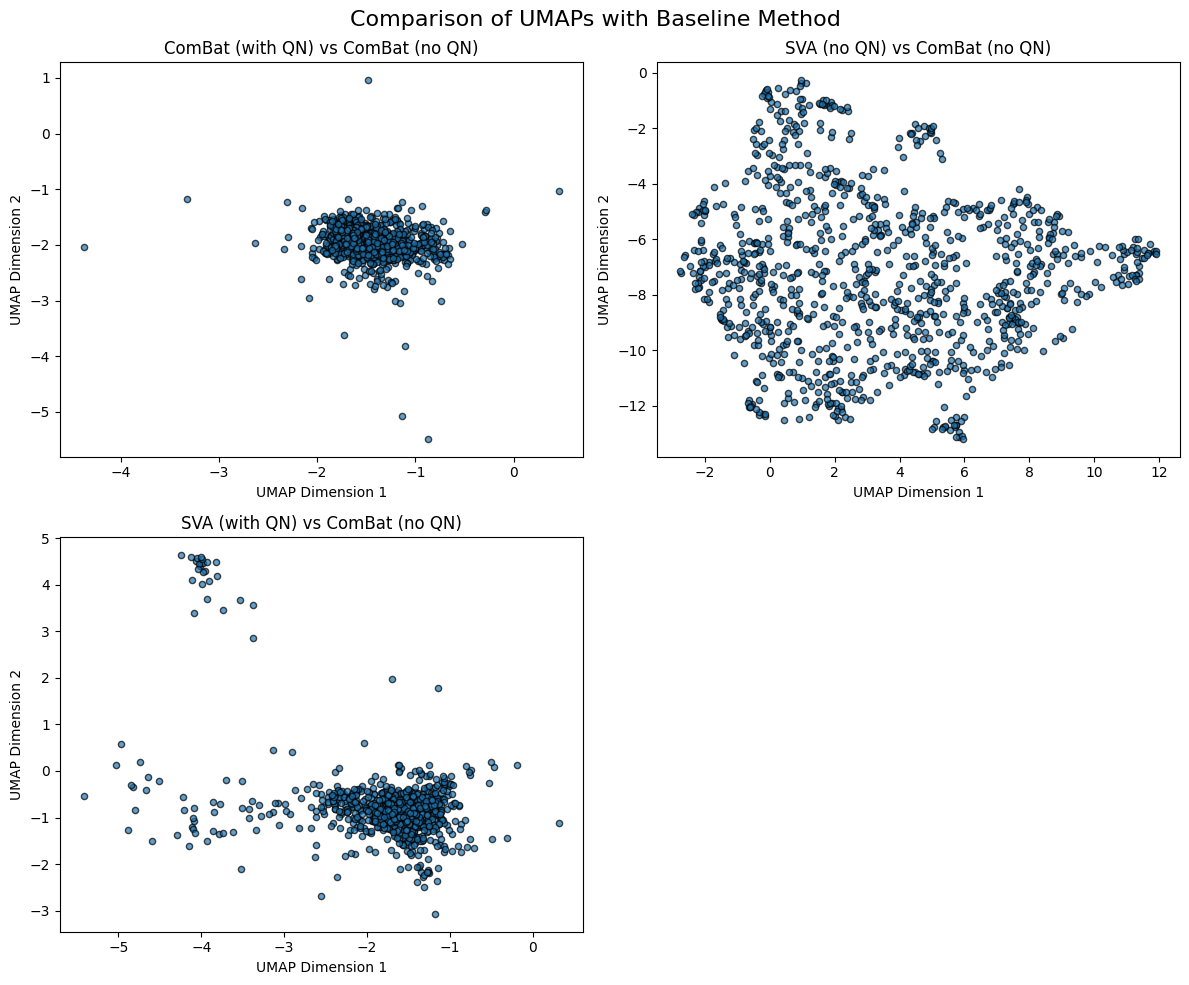


📊 Summary of Batch Effect Removal Methods (Sorted by Best Batch Effect Removal):
          Method  Silhouette Score  Batch Variance
   SVA (with QN)         -0.016989    3.754239e-31
     SVA (no QN)         -0.034823    4.216681e-31
  ComBat (no QN)         -0.001815    1.542802e-07
ComBat (with QN)         -0.003379    4.367439e-07


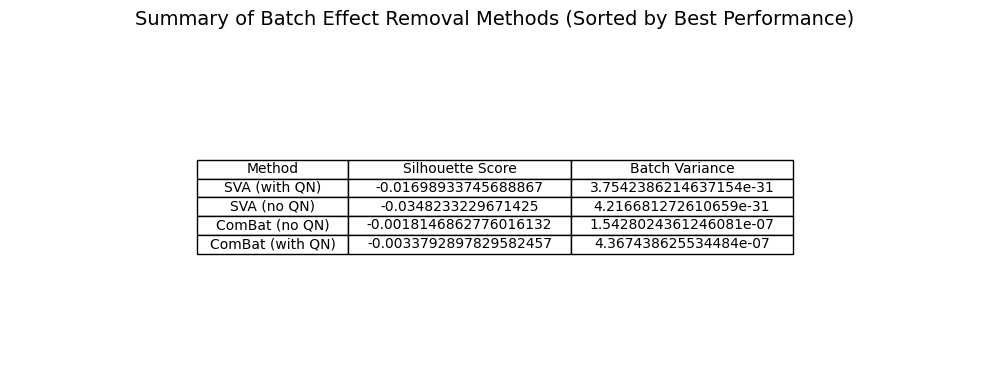

TypeError: cannot unpack non-iterable NoneType object

In [6]:
# import scanpy as sc
# import pandas as pd
# import numpy as np
# import umap
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.preprocessing import StandardScaler, QuantileTransformer
# from sklearn.metrics import silhouette_score


# # === Batch Effect Removal Pipeline and UMAP Visualization ===
# def batch_effect_pipeline(data, batch_labels):
#     """
#     Pipeline for batch effect removal (ComBat, SVA) and UMAP visualization.

#     Parameters:
#     - data: Gene expression data matrix
#     - batch_labels: Batch labels for samples

#     Returns:
#     - processed_data: Dictionary with batch-effect-corrected gene expression matrices
#     - embeddings: Dictionary with UMAP embeddings for each method
#     - results: Dictionary with batch effect removal evaluation metrics
#     """

#     print("🔄 Verifying data consistency...")
#     assert len(data) == len(batch_labels), "Data and batch labels must have the same number of samples!"
#     assert batch_labels.isnull().sum() == 0, "Batch labels cannot contain null values!"
#     print(f"✅ Number of samples: {len(data)}")
#     print(f"✅ Unique batch labels: {batch_labels.unique()}")

#     batch_labels = batch_labels.astype('category')

#     # Data standardization
#     scaler = StandardScaler()
#     data_scaled = scaler.fit_transform(data)

#     # Quantile Normalization
#     transformer = QuantileTransformer(output_distribution='normal', random_state=42, copy=True)
#     data_qn = transformer.fit_transform(data_scaled)

#     methods = {
#         'ComBat (no QN)': data_scaled,
#         'ComBat (with QN)': data_qn,
#         'SVA (no QN)': data_scaled,
#         'SVA (with QN)': data_qn
#     }

#     embeddings = {}
#     processed_data = {}
#     results = {}

#     # Wykres UMAP dla każdej metody na jednym obrazie
#     fig, axes = plt.subplots(1, len(methods), figsize=(5 * len(methods), 5))
#     fig.suptitle('UMAP for Different Batch Effect Removal Methods', fontsize=16)

#     for idx, (method, dataset) in enumerate(methods.items()):
#         adata = sc.AnnData(dataset)
#         adata.obs['batch'] = batch_labels.values
#         adata.obs['batch'] = adata.obs['batch'].astype('category')
#         adata.obs['method'] = method

#         if 'ComBat' in method:
#             sc.pp.combat(adata, key='batch')
#         elif 'SVA' in method:
#             sc.pp.regress_out(adata, ['batch'])

#         # Zachowanie przetworzonej macierzy ekspresji genów
#         processed_data[method] = pd.DataFrame(
#             adata.X,
#             index=data.index,
#             columns=data.columns
#         )

#         # UMAP Dimensionality Reduction
#         reducer = umap.UMAP(random_state=42)
#         embedding = reducer.fit_transform(adata.X)
#         embeddings[method] = embedding

#         # Evaluation Metrics
#         silhouette = silhouette_score(adata.X, adata.obs['batch'])
#         batch_variance = np.var(np.mean(adata.X, axis=0))

#         results[method] = {
#             'Silhouette Score': silhouette,
#             'Batch Variance': batch_variance
#         }

#         # Wykres UMAP dla każdej metody
#         ax = axes[idx]
#         for batch in batch_labels.unique():
#             subset = adata.obs['batch'] == batch
#             ax.scatter(
#                 embedding[subset, 0],
#                 embedding[subset, 1],
#                 label=batch,
#                 s=20,
#                 alpha=0.7,
#                 edgecolor='k'
#             )
#         ax.set_title(f'{method}')
#         ax.set_xlabel('UMAP Dimension 1')
#         ax.set_ylabel('UMAP Dimension 2')
#         ax.legend(fontsize='small', loc='upper right')

#     plt.tight_layout()
#     plt.show()

#     # Porównanie wszystkich metod z pierwszym UMAP-em
#     baseline_method = list(embeddings.keys())[0]
#     baseline_embedding = embeddings[baseline_method]

#     fig, axes = plt.subplots(1, len(embeddings) - 1, figsize=(5 * (len(embeddings) - 1), 5))
#     fig.suptitle('Comparison of UMAPs with Baseline Method', fontsize=16)

#     for idx, (method, embedding) in enumerate(list(embeddings.items())[1:]):
#         ax = axes[idx]
#         difference = embedding - baseline_embedding
#         ax.scatter(
#             difference[:, 0],
#             difference[:, 1],
#             s=20,
#             alpha=0.7,
#             edgecolor='k'
#         )
#         ax.set_title(f'{method} vs {baseline_method}')
#         ax.set_xlabel('UMAP Dimension 1')
#         ax.set_ylabel('UMAP Dimension 2')

#     plt.tight_layout()
#     plt.show()

#     # Wyświetlanie raportu podsumowującego
#     results_df = pd.DataFrame(results).T
#     results_df.reset_index(inplace=True)
#     results_df.rename(columns={'index': 'Method'}, inplace=True)
#     results_df = results_df.sort_values(by='Silhouette Score')

#     print("\n📊 Summary of Batch Effect Removal Methods:")
#     print(results_df.to_string(index=False))

#     # Wyświetlenie raportu jako tabela
#     fig, ax = plt.subplots(figsize=(10, 4))
#     ax.axis('off')
#     ax.axis('tight')
#     table = ax.table(cellText=results_df.values,
#                      colLabels=results_df.columns,
#                      cellLoc='center',
#                      loc='center')
#     table.auto_set_font_size(False)
#     table.set_fontsize(10)
#     table.auto_set_column_width(col=list(range(len(results_df.columns))))
#     plt.title("Summary of Batch Effect Removal Methods", fontsize=14)
#     plt.tight_layout()
#     plt.show()

#     return processed_data, embeddings, results

# # Przygotowanie danych
# numerical_data = ustekinumab.select_dtypes(include=[np.number]).dropna(axis=0, how='any')
# numerical_data = numerical_data.loc[ustekinumab['dataset'].index]
# valid_idx = ustekinumab['dataset'].notnull()
# numerical_data = numerical_data[valid_idx]
# dataset_labels = ustekinumab['dataset'][valid_idx]

# # Przetwarzanie danych i generowanie wyników
# processed_data, embeddings, results = batch_effect_pipeline(numerical_data, dataset_labels)
import scanpy as sc
import pandas as pd
import numpy as np
import umap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.metrics import silhouette_score
import math


# === Batch Effect Removal Pipeline and UMAP Visualization ===
def batch_effect_pipeline(data, batch_labels):
    """
    Pipeline for batch effect removal (ComBat, SVA) and UMAP visualization.

    Parameters:
    - data: Gene expression data matrix
    - batch_labels: Batch labels for samples

    Returns:
    - processed_data: Dictionary with batch-effect-corrected gene expression matrices
    - embeddings: Dictionary with UMAP embeddings for each method
    - results: Dictionary with batch effect removal evaluation metrics
    """

    print("🔄 Verifying data consistency...")
    assert len(data) == len(batch_labels), "Data and batch labels must have the same number of samples!"
    assert batch_labels.isnull().sum() == 0, "Batch labels cannot contain null values!"
    print(f"✅ Number of samples: {len(data)}")
    print(f"✅ Unique batch labels: {batch_labels.unique()}")

    batch_labels = batch_labels.astype('category')

    # Data standardization
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    # Quantile Normalization
    transformer = QuantileTransformer(output_distribution='normal', random_state=42, copy=True)
    data_qn = transformer.fit_transform(data_scaled)

    methods = {
        'ComBat (no QN)': data_scaled,
        'ComBat (with QN)': data_qn,
        'SVA (no QN)': data_scaled,
        'SVA (with QN)': data_qn
    }

    embeddings = {}
    processed_data = {}
    results = {}

    # UMAP Visualization with Two Plots Per Row
    n_methods = len(methods)
    n_rows = math.ceil(n_methods / 2)
    fig, axes = plt.subplots(n_rows, 2, figsize=(12, 5 * n_rows))
    axes = axes.flatten()
    fig.suptitle('UMAP for Different Batch Effect Removal Methods', fontsize=16)

    for idx, (method, dataset) in enumerate(methods.items()):
        adata = sc.AnnData(dataset)
        adata.obs['batch'] = batch_labels.values
        adata.obs['batch'] = adata.obs['batch'].astype('category')
        adata.obs['method'] = method

        if 'ComBat' in method:
            sc.pp.combat(adata, key='batch')
        elif 'SVA' in method:
            sc.pp.regress_out(adata, ['batch'])

        # Save processed data
        processed_data[method] = pd.DataFrame(
            adata.X,
            index=data.index,
            columns=data.columns
        )

        # UMAP Dimensionality Reduction
        reducer = umap.UMAP(random_state=42)
        embedding = reducer.fit_transform(adata.X)
        embeddings[method] = embedding

        # Evaluation Metrics
        silhouette = silhouette_score(adata.X, adata.obs['batch'])
        batch_variance = np.var(np.mean(adata.X, axis=0))

        results[method] = {
            'Silhouette Score': silhouette,
            'Batch Variance': batch_variance
        }

        # UMAP Plot
        ax = axes[idx]
        for batch in batch_labels.unique():
            subset = adata.obs['batch'] == batch
            ax.scatter(
                embedding[subset, 0],
                embedding[subset, 1],
                label=batch,
                s=20,
                alpha=0.7,
                edgecolor='k'
            )
        ax.set_title(f'{method}')
        ax.set_xlabel('UMAP Dimension 1')
        ax.set_ylabel('UMAP Dimension 2')
        ax.legend(fontsize='small', loc='upper right')

    # Hide unused axes if methods are not even
    for i in range(len(methods), len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

    # Comparison with Baseline Method
    baseline_method = list(embeddings.keys())[0]
    baseline_embedding = embeddings[baseline_method]

    n_comparisons = len(embeddings) - 1
    n_rows = math.ceil(n_comparisons / 2)
    fig, axes = plt.subplots(n_rows, 2, figsize=(12, 5 * n_rows))
    axes = axes.flatten()
    fig.suptitle('Comparison of UMAPs with Baseline Method', fontsize=16)

    for idx, (method, embedding) in enumerate(list(embeddings.items())[1:]):
        ax = axes[idx]
        difference = embedding - baseline_embedding
        ax.scatter(
            difference[:, 0],
            difference[:, 1],
            s=20,
            alpha=0.7,
            edgecolor='k'
        )
        ax.set_title(f'{method} vs {baseline_method}')
        ax.set_xlabel('UMAP Dimension 1')
        ax.set_ylabel('UMAP Dimension 2')

    for i in range(n_comparisons, len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

        # Displaying Evaluation Metrics
    results_df = pd.DataFrame(results).T
    results_df.reset_index(inplace=True)
    results_df.rename(columns={'index': 'Method'}, inplace=True)

    # Sorting by Batch Variance (ascending) and then by Silhouette Score (descending)
    results_df = results_df.sort_values(
        by=['Batch Variance', 'Silhouette Score'],
        ascending=[True, False]
    )

    print("\n📊 Summary of Batch Effect Removal Methods (Sorted by Best Batch Effect Removal):")
    print(results_df.to_string(index=False))

    # Display as Table
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.axis('off')
    table = ax.table(cellText=results_df.values,
                     colLabels=results_df.columns,
                     cellLoc='center',
                     loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width(col=list(range(len(results_df.columns))))
    plt.title("Summary of Batch Effect Removal Methods (Sorted by Best Performance)", fontsize=14)
    plt.tight_layout()
    plt.show()


# === Data Preparation ===
numerical_data = ustekinumab.select_dtypes(include=[np.number]).dropna(axis=0, how='any')
numerical_data = numerical_data.loc[ustekinumab['dataset'].index]
valid_idx = ustekinumab['dataset'].notnull()
numerical_data = numerical_data[valid_idx]
dataset_labels = ustekinumab['dataset'][valid_idx]

# === Run the Pipeline ===
processed_data, embeddings, results = batch_effect_pipeline(numerical_data, dataset_labels)



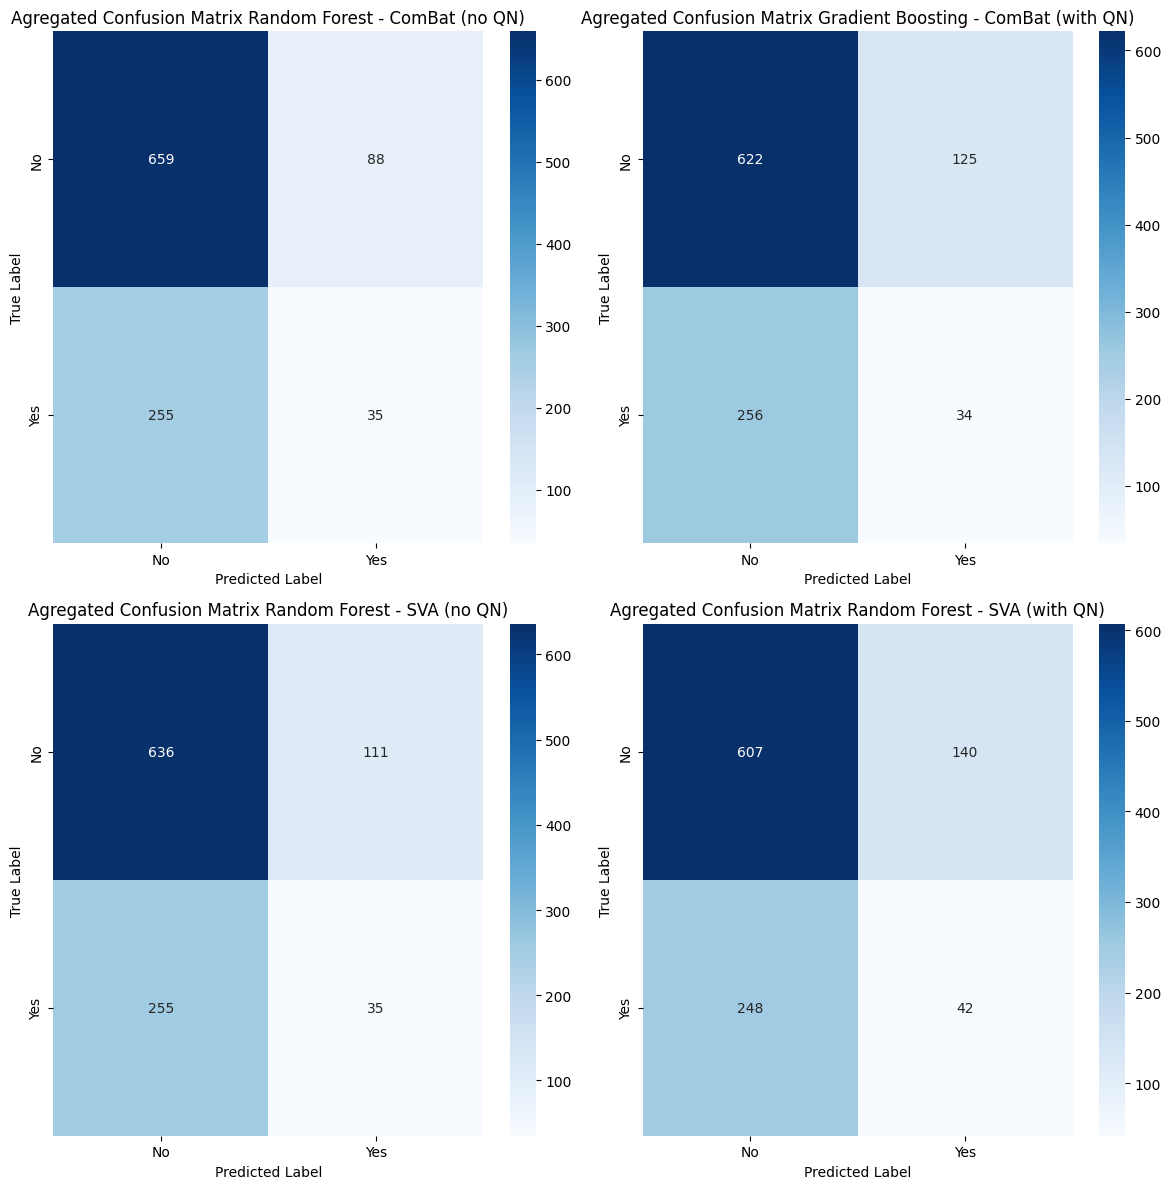

In [18]:
# 📌 1. Importowanie bibliotek
import pandas as pd
import numpy as np
from sklearn.model_selection import GroupKFold, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

# 📌 2. Definicja modeli i parametrów
models = {
    'Random Forest': {
        'classifier': RandomForestClassifier(random_state=23),
        'param_grid': {
            'classifier__bootstrap': [False],
            'classifier__class_weight': ['balanced'],
            'classifier__max_depth': [None],
            'classifier__max_features': ['sqrt'],
            'classifier__min_samples_leaf': [1],
            'classifier__min_samples_split': [2],
            'classifier__n_estimators': [200]
        }
    },
    'Gradient Boosting': {
        'classifier': GradientBoostingClassifier(random_state=23),
        'param_grid': {
            'classifier__learning_rate': [0.1],
            'classifier__max_depth': [7],
            'classifier__max_features': ['sqrt'],
            'classifier__min_samples_leaf': [5],
            'classifier__min_samples_split': [2],
            'classifier__n_estimators': [300],
            'classifier__subsample': [0.8]
        }
    },
    'LightGBM': {
        'classifier': LGBMClassifier(random_state=23),
        'param_grid': {
            'classifier__n_estimators': [200],
            'classifier__learning_rate': [0.1],
            'classifier__max_depth': [7],
            'classifier__num_leaves': [31],
            'classifier__min_child_samples': [20],
            'classifier__subsample': [0.8],
            'classifier__verbose': [-1]
        }
    },
    'XGBoost': {
        'classifier': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=23),
        'param_grid': {
            'classifier__colsample_bytree': [0.8],
            'classifier__gamma': [0],
            'classifier__learning_rate': [0.1],
            'classifier__max_depth': [8],
            'classifier__n_estimators': [300],
            'classifier__reg_alpha': [0.05],
            'classifier__reg_lambda': [0.5],
            'classifier__subsample': [0.7]
        }
    },
    'Logistic Regression': {
        'classifier': LogisticRegression(max_iter=1000, random_state=23),
        'param_grid': {
            'classifier__C': [1],
            'classifier__fit_intercept': [True],
            'classifier__max_iter': [500],
            'classifier__penalty': ['l2'],
            'classifier__solver': ['liblinear'],
            'classifier__tol': [0.001]
        }
    }
}

# 📌 3. Funkcja wyrównywania danych i etykiet
def align_data_and_labels(processed_data, target, groups):
    common_index = target.index & groups.index
    for method in processed_data.keys():
        common_index = common_index & processed_data[method].index

    target = target.loc[common_index]
    groups = groups.loc[common_index]
    for method in processed_data.keys():
        processed_data[method] = processed_data[method].loc[common_index]

    return processed_data, target, groups

# 📌 4. Funkcja ewaluacji modeli
def evaluate_models_on_processed_data(processed_data, target, groups):
    roc_data = []
    aggregated_confusion_matrices = {}

    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(target)
    group_kfold = GroupKFold(n_splits=3)

    for method_name, data in processed_data.items():
        print(f"\n🚀 **Evaluating models on method: {method_name}**")
        X = pd.DataFrame(data, index=target.index)

        best_model_name = None
        aggregated_cm = np.zeros((2, 2))  # Zakładamy problem binarny
        best_auc = -np.inf

        for model_name, model_info in models.items():
            param_grid = model_info['param_grid']

            current_cm = np.zeros((2, 2))
            fold_aucs = []

            for train_idx, val_idx in group_kfold.split(X, y, groups):
                X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
                y_train, y_val = y[train_idx], y[val_idx]

                smote = SMOTE(sampling_strategy='minority', random_state=23)
                X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

                pipeline = ImbPipeline([
                    ('variance', VarianceThreshold(threshold=0.01)),
                    ('scaling', StandardScaler()),
                    ('feature_selection', SelectKBest(score_func=f_classif, k=50)),
                    ('classifier', model_info['classifier'])
                ])

                grid_search = GridSearchCV(
                    estimator=pipeline,
                    param_grid=param_grid,
                    cv=3,
                    scoring='roc_auc',
                    n_jobs=-1
                )

                grid_search.fit(X_train_res, y_train_res)
                best_model_fold = grid_search.best_estimator_

                y_pred = best_model_fold.predict(X_val)
                fold_cm = confusion_matrix(y_val, y_pred)
                current_cm += fold_cm

                fold_auc = auc(*roc_curve(y_val, best_model_fold.predict_proba(X_val)[:, 1])[:2])
                fold_aucs.append(fold_auc)

            mean_auc = np.mean(fold_aucs)
            if mean_auc > best_auc:
                best_auc = mean_auc
                best_model_name = model_name
                aggregated_cm = current_cm

        aggregated_confusion_matrices[method_name] = (best_model_name, aggregated_cm)

    return aggregated_confusion_matrices

# 📌 Funkcja wizualizacji macierzy błędu (zaokrąglona do liczb całkowitych)
def visualize_confusion_matrix(aggregated_confusion_matrices):
    """
    Wizualizuje zagregowane macierze błędu dla najlepszych modeli w każdej metodzie usuwania batch effect.
    """
    num_methods = len(aggregated_confusion_matrices)
    rows = (num_methods + 1) // 2  # Obliczamy liczbę rzędów, zaokrąglając w górę
    cols = 2  # Stała liczba kolumn

    fig, axes = plt.subplots(rows, cols, figsize=(12, 6 * rows))
    axes = axes.flatten()  # Spłaszczenie tablicy osi dla łatwego iterowania

    for idx, (method, (model_name, cm)) in enumerate(aggregated_confusion_matrices.items()):
        cm = np.round(cm).astype(int)  # Zaokrąglenie i konwersja do liczb całkowitych

        sns.heatmap(
            cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            ax=axes[idx],
            xticklabels=['No', 'Yes'],  # Ustawienie etykiet dla osi X
            yticklabels=['No', 'Yes']   # Ustawienie etykiet dla osi Y
        )

        axes[idx].set_title(f'Agregated Confusion Matrix {model_name} - {method}')
        axes[idx].set_xlabel('Predicted Label')
        axes[idx].set_ylabel('True Label')

    # Ukrycie niewykorzystanych osi
    for i in range(idx + 1, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

# 📌 6. Wywołanie skryptu
groups = ustekinumab['dataset']
target = ustekinumab["response"]
processed_data, target, groups = align_data_and_labels(processed_data, target, groups)
aggregated_confusion_matrices = evaluate_models_on_processed_data(processed_data, target, groups)
visualize_confusion_matrix(aggregated_confusion_matrices)


In [ ]:
# Tu dziala

In [ ]:
# import pandas as pd
# import numpy as np
# import os
# from sklearn.model_selection import GroupKFold, GridSearchCV
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold
# from sklearn.pipeline import Pipeline
# from imblearn.pipeline import Pipeline as ImbPipeline
# from imblearn.over_sampling import SMOTE
# from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from lightgbm import LGBMClassifier
# from xgboost import XGBClassifier
# from sklearn.linear_model import LogisticRegression
# import matplotlib.pyplot as plt
# import seaborn as sns

# # === 1. Przygotowanie Danych ===
# X = pd.DataFrame(adata.X, index=ustekinumab.index, columns=numerical_data.columns)
# y = ustekinumab['response']
# groups = ustekinumab['dataset']

# # Zakodowanie etykiet
# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(y)

# print("✅ Dane zostały przygotowane.")
# print(f"🎯 Unikalne wartości w y: {np.unique(y)}\n")

# # === 2. GroupKFold - Podział na foldy walidacyjne ===
# print("🚀 Walidacja krzyżowa z użyciem GroupKFold na pełnym zbiorze danych...")

# group_kfold = GroupKFold(n_splits=3)
# fold_indices = []

# for fold_idx, (train_idx, val_idx) in enumerate(group_kfold.split(X, y, groups)):
#     train_groups = groups.iloc[train_idx].unique()
#     val_groups = groups.iloc[val_idx].unique()

#     fold_indices.append((train_idx, val_idx))
#     print(f"🔄 **Fold {fold_idx + 1}**")
#     print(f"Train Groups: {train_groups}")
#     print(f"Validation Groups: {val_groups}")
#     print("-" * 40)

# input("✅ Sprawdź powyższy podział grup i wciśnij Enter, aby kontynuować...")

# # === 3. Definicja modeli i hiperparametrów ===
# models = {
#     'Random Forest': {
#         'classifier': RandomForestClassifier(random_state=23),
#         'param_grid': {
#             'feature_selection__k': [20, 50],
#             'classifier__n_estimators': [100, 200],
#             'classifier__max_depth': [5, 10, None],
#         }
#     },
#     'Gradient Boosting': {
#         'classifier': GradientBoostingClassifier(random_state=23),
#         'param_grid': {
#             'feature_selection__k': [50],
#             'classifier__n_estimators': [100, 150],
#             'classifier__learning_rate': [0.05, 0.1],
#         }
#     },
#     'LightGBM': {
#         'classifier': LGBMClassifier(random_state=23),
#         'param_grid': {
#             'feature_selection__k': [20, 50],
#             'classifier__n_estimators': [100, 200],
#             'classifier__learning_rate': [0.05, 0.1],
#             'classifier__max_depth': [-1, 10, 20],
#         }
#     },
#     'XGBoost': {
#         'classifier': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=23),
#         'param_grid': {
#             'feature_selection__k': [20, 50],
#             'classifier__n_estimators': [100, 200],
#             'classifier__learning_rate': [0.05, 0.1],
#             'classifier__max_depth': [3, 5, 7],
#         }
#     },
#     'Logistic Regression': {
#         'classifier': LogisticRegression(max_iter=1000, random_state=23),
#         'param_grid': {
#             'feature_selection__k': [20, 50],
#             'classifier__C': [0.1, 1.0, 10.0],
#             'classifier__penalty': ['l1', 'l2'],
#             'classifier__solver': ['liblinear', 'lbfgs']
#         }
#     }
# }

# # === 4. Trenowanie modeli i zbieranie wyników ===
# roc_data = []
# confusion_matrices = []
# feature_importances_all = []

# for model_name, model_info in models.items():
#     param_grid = model_info['param_grid']

#     for fold_idx, (train_idx, val_idx) in enumerate(fold_indices):
#         print(f"🔄 **Fold {fold_idx + 1} - {model_name}**")

#         X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
#         y_train_fold, y_val_fold = y[train_idx], y[val_idx]

#         smote = SMOTE(sampling_strategy='minority', random_state=23)
#         X_train_res, y_train_res = smote.fit_resample(X_train_fold, y_train_fold)

#         pipeline = ImbPipeline([
#             ('variance', VarianceThreshold(threshold=0.01)),
#             ('scaling', StandardScaler()),
#             ('feature_selection', SelectKBest(score_func=f_classif, k=50)),
#             ('classifier', model_info['classifier'])
#         ])

#         grid_search = GridSearchCV(
#             estimator=pipeline,
#             param_grid=param_grid,
#             cv=3,
#             scoring='roc_auc',
#             n_jobs=-1
#         )

#         grid_search.fit(X_train_res, y_train_res)
#         best_model = grid_search.best_estimator_

#         # ROC-AUC
#         y_prob = best_model.predict_proba(X_val_fold)[:, 1]
#         roc_auc = roc_auc_score(y_val_fold, y_prob)
#         fpr, tpr, _ = roc_curve(y_val_fold, y_prob)
#         roc_data.append((model_name, fold_idx + 1, fpr, tpr, roc_auc))

#         # Macierz błędu
#         y_pred = best_model.predict(X_val_fold)
#         cm = confusion_matrix(y_val_fold, y_pred)
#         confusion_matrices.append((model_name, fold_idx + 1, cm))

# # Ważność cech (jeśli dostępna)
# if hasattr(best_model.named_steps['classifier'], 'feature_importances_'):
#     importances = best_model.named_steps['classifier'].feature_importances_
#     selected_features = X_train_res.columns[best_model.named_steps['feature_selection'].get_support()]
#     feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': importances})
#     top10 = feature_importance_df.nlargest(10, 'Importance')
#     feature_importances_all.append((model_name, fold_idx + 1, top10))

# # === 5. Wizualizacja ===

# # Krzywe ROC
# plt.figure(figsize=(14, 10))
# for model_name, fold_idx, fpr, tpr, auc in roc_data:
#     plt.plot(fpr, tpr, label=f'{model_name} (Fold {fold_idx}) AUC={auc:.2f}')
# plt.plot([0, 1], [0, 1], linestyle='--')
# plt.title('ROC Curves with Fold Numbers')
# plt.legend()
# plt.show()

# # Macierze błędu
# for model_name, fold_idx, cm in confusion_matrices:
#     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
#     plt.title(f'Confusion Matrix - {model_name} (Fold {fold_idx})')
#     plt.show()

# # Najważniejsze cechy
# for model_name, fold_idx, top10 in feature_importances_all:
#     top10.plot(kind='bar', x='Feature', y='Importance', legend=False)
#     plt.title(f'Top 10 Features - {model_name} (Fold {fold_idx})')
#     plt.show()


In [ ]:
# import seaborn as sns

# # Analiza rozrzutu AUC dla każdego modelu
# auc_df = pd.DataFrame(roc_data, columns=['Model', 'Fold', 'FPR', 'TPR', 'AUC'])

# plt.figure(figsize=(12, 6))
# sns.boxplot(data=auc_df, x='Model', y='AUC')
# plt.title('AUC Distribution Across Folds for Each Model')
# plt.show()


In [ ]:
# import numpy as np
# import pandas as pd

# # Odtworzenie validation_results na podstawie dostępnych danych
# validation_results = []

# for model_name in set(m[0] for m in roc_data):
#     model_roc_aucs = [auc for m_name, _, _, _, auc in roc_data if m_name == model_name]
#     model_confusions = [cm for m_name, _, cm in confusion_matrices if m_name == model_name]

#     # Średnia AUC
#     mean_auc = np.mean(model_roc_aucs)

#     # Łączna macierz błędu
#     total_cm = np.sum(model_confusions, axis=0)
#     TN, FP, FN, TP = total_cm.ravel()

#     # Dodatkowe metryki
#     accuracy = (TP + TN) / (TP + TN + FP + FN)
#     precision = TP / (TP + FP) if (TP + FP) != 0 else 0
#     recall = TP / (TP + FN) if (TP + FN) != 0 else 0
#     f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

#     validation_results.append({
#         'Model': model_name,
#         'Mean AUC': mean_auc,
#         'Accuracy': accuracy,
#         'Precision': precision,
#         'Recall': recall,
#         'F1 Score': f1,
#         'Total Confusion Matrix': total_cm
#     })

# # Wyświetlenie wyników jako tabela
# validation_summary = pd.DataFrame(validation_results)
# print(validation_summary)


In [ ]:
# for result in validation_results:
#     model_name = result['Model']
#     cm = result['Total Confusion Matrix']

#     plt.figure(figsize=(6, 5))
#     sns.heatmap(
#         cm,
#         annot=True,
#         fmt='d',
#         cmap='Blues'
#     )
#     plt.title(f'Aggregated Confusion Matrix - {model_name}')
#     plt.xlabel('Predicted Label')
#     plt.ylabel('True Label')
#     plt.show()
